# Name: Abhay Sharma
# Roll: 22CH10001

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(42)

Closed form Linear Regression

In [3]:
class LR_ClosedForm:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return np.array(X @ self.theta)

Linear Regression using Gradient Descent

In [4]:
class LR_GradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.iterations):
            y_predicted = np.dot(X_standardized, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X_standardized.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        return np.dot(X_standardized, self.weights) + self.bias

Experiment-01

In [5]:
# loading dataset
dataset = pd.read_csv('BostonHousingDataset.csv')
dataset = dataset.drop(['B', 'LSTAT'], axis=1)
dataset_altered = dataset.dropna()
dataset_altered = dataset_altered.astype(float)
dataset_altered.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,28.7
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,18.9


Experiment-02

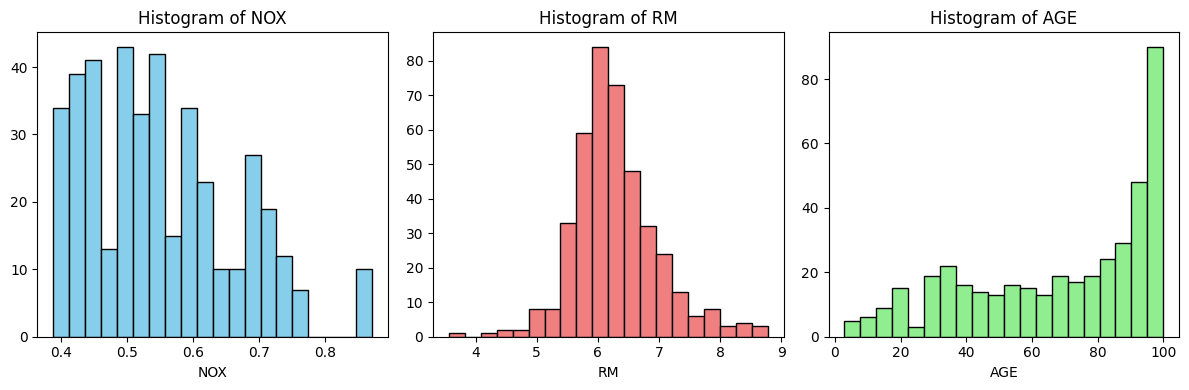

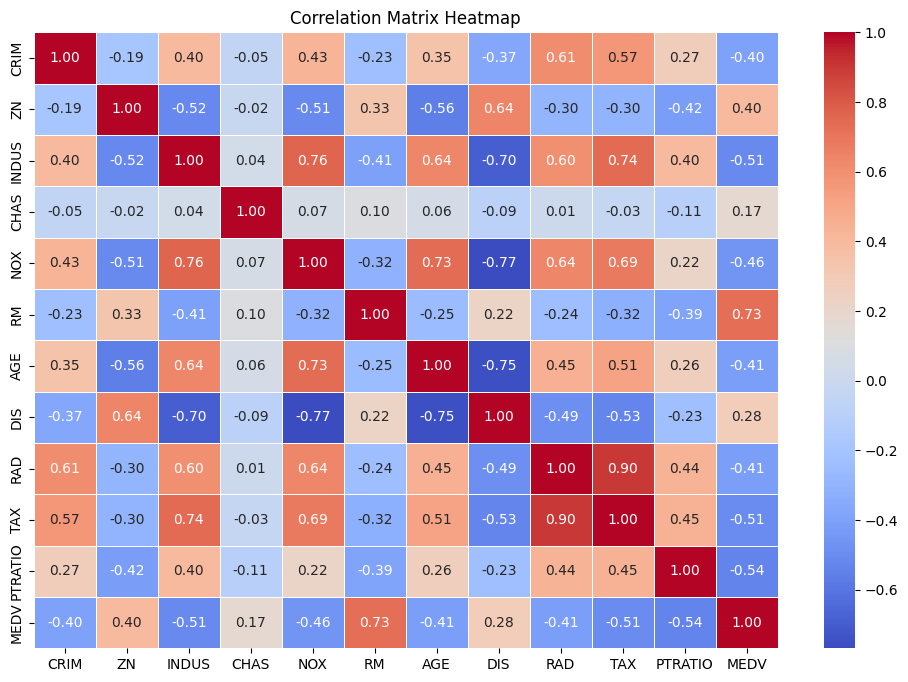

In [6]:
# Plotting histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(dataset_altered['NOX'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of NOX')
plt.xlabel('NOX')

plt.subplot(1, 3, 2)
plt.hist(dataset_altered['RM'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of RM')
plt.xlabel('RM')

plt.subplot(1, 3, 3)
plt.hist(dataset_altered['AGE'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of AGE')
plt.xlabel('AGE')

plt.tight_layout()
plt.show()

# correlation coefficients 
correlation_table = dataset_altered.corr()

# Plotting the correlation matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Experiment-03

In [7]:
from sklearn.model_selection import train_test_split

X = dataset_altered.drop('MEDV', axis=1)
y = dataset_altered['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

print("Features Training Set:", X_train.shape)
print("Features Testing Set:", X_test.shape)
print("Target Training Set:", y_train.shape)
print("Target Testing Set:", y_test.shape)

Features Training Set: (370, 11)
Features Testing Set: (42, 11)
Target Training Set: (370,)
Target Testing Set: (42,)


Experiment-04

In [8]:
def Calculate_RMSE(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_pred - y_true)))

In [9]:
model = LR_ClosedForm()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coefficients = model.theta[1:]
intercept = model.theta[0]

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("RMSE:", Calculate_RMSE(y_test, y_pred))

Coefficients: [-1.64988173e-01  3.73093490e-02 -9.87442617e-03  3.21391436e+00
 -2.27553707e+01  6.16182106e+00 -4.96702692e-02 -1.48516544e+00
  2.39856484e-01 -1.20609362e-02 -1.00154675e+00]
Intercept: 26.713825236556403
RMSE: 3.7846529574647403


Experiment-05

Optimal learning rate: 0.1
Optimal coefficients: [-1.55908907  0.8865506  -0.06988328  0.82174483 -2.53634841  4.35916899
 -1.37712025 -3.05785509  2.09436154 -2.04512379 -2.13048576]
Optimal intercept: 22.47405405405404
RMSE: 3.443138526682574


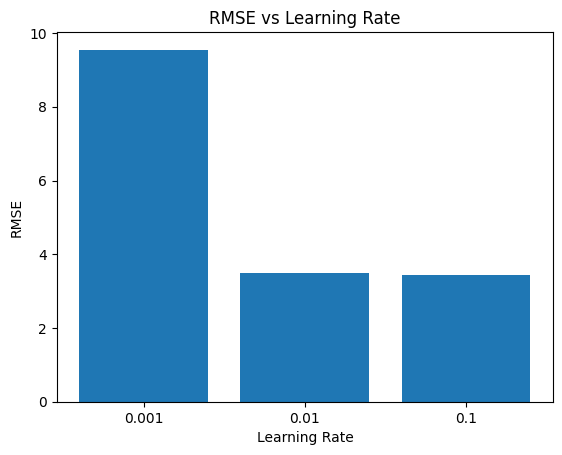

In [10]:
learning_rates = [0.001, 0.01, 0.1]
rmse_values = []
models = []

for lr in learning_rates:
    model = LR_GradientDescent(learning_rate=lr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = Calculate_RMSE(y_test, y_pred)
    rmse_values.append(rmse)
    models.append(model)

# Finding the model with the lowest RMSE
min_index = np.argmin(rmse_values)
optimal_model = models[min_index]
optimal_lr = learning_rates[min_index]

print("Optimal learning rate:", optimal_lr)
print("Optimal coefficients:", optimal_model.weights)
print("Optimal intercept:", optimal_model.bias)
print("RMSE:", rmse_values[min_index])

learning_rates_str = [str(lr) for lr in learning_rates]

plt.bar(learning_rates_str, rmse_values)
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.title('RMSE vs Learning Rate')
plt.show()